# MicroC

Plot MicroC data from fibroblasts and H1-ESCs at specific loci.

In [264]:
library(BentoBox)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)
library(RColorBrewer)
library(ggplotify)

In [244]:
START=7614244-1e5
END=7847248+1e5

In [252]:
NORM="NONE"

In [253]:
cts_hff =bb_readHic("/mnt/lab_data3/surag/resources/4DN/HFF-MicroC-4DNFIPC7P27B.hic",
                 chrom="12",
                 chromstart = START,
                 chromend = END,
                    norm=NORM,
          resolution=5000)$counts

quantile(cts_hff, 0.91)

Read in hic file with NONE normalization at 5000 BP resolution.



91% 
120

In [254]:
cts_hesc =bb_readHic("/mnt/lab_data3/surag/resources/4DN/H1-hESC-4DNFI2TK7L2F.hic",
                 chrom="12",
                 chromstart = START,
                 chromend = END,
                    norm=NORM,
          resolution=5000)$counts

quantile(cts_hesc, 0.91)

Read in hic file with NONE normalization at 5000 BP resolution.



91% 
93.44

In [405]:
SZ = 8
Q = 0.95

make_hic <- function() {

    bb_pageCreate(width = SZ, height = SZ+1, default.units = "inches")

    bb_plotHicSquare("/mnt/lab_data3/surag/resources/4DN/HFF-MicroC-4DNFIPC7P27B.hic",
                     chrom="12",
                     chromstart = START,
                     chromend = END,
                     zrange=quantile(cts_hff, c(0.05,Q)),
                     norm=NORM,
                     resolution=5000,
                     half='top',
    #                  palette = colorRampPalette(brewer.pal(n = 9, "YlOrRd")),
                     width=SZ, height=SZ, x=0, y=0,
                     default.units="inches"
    #                   matrix = "oe",
                     )


    hesc_hic <- bb_plotHicSquare("/mnt/lab_data3/surag/resources/4DN/H1-hESC-4DNFI2TK7L2F.hic",
                     chrom="12",
                     chromstart = START,
                     chromend = END,
                     zrange=quantile(cts_hesc, c(0.05,Q)),
                     norm=NORM,
                     resolution=5000,
                     half='bottom',
                     width=SZ, height=SZ, x=0, y=0,
    #                  palette = colorRampPalette(brewer.pal(n = 9, "YlOrRd")),
                     default.units="inches",
    #                  matrix = "oe"
                     )
    
    
    bb_plotGenes(
        assembly = "hg38",
        chrom = "chr12", chromstart = START, chromend = END,
        width=SZ, height=1, x=0, y=SZ,
                     default.units="inches",
    )

    bb_pageGuideHide()
}

Read in hic file with NONE normalization at 5000 BP resolution.

bb_hicSquare[bb_hicSquare1]

Read in hic file with NONE normalization at 5000 BP resolution.

bb_hicSquare[bb_hicSquare2]

bb_genes[bb_genes1]

Read in hic file with NONE normalization at 5000 BP resolution.

bb_hicSquare[bb_hicSquare1]

Read in hic file with NONE normalization at 5000 BP resolution.

bb_hicSquare[bb_hicSquare2]

bb_genes[bb_genes1]



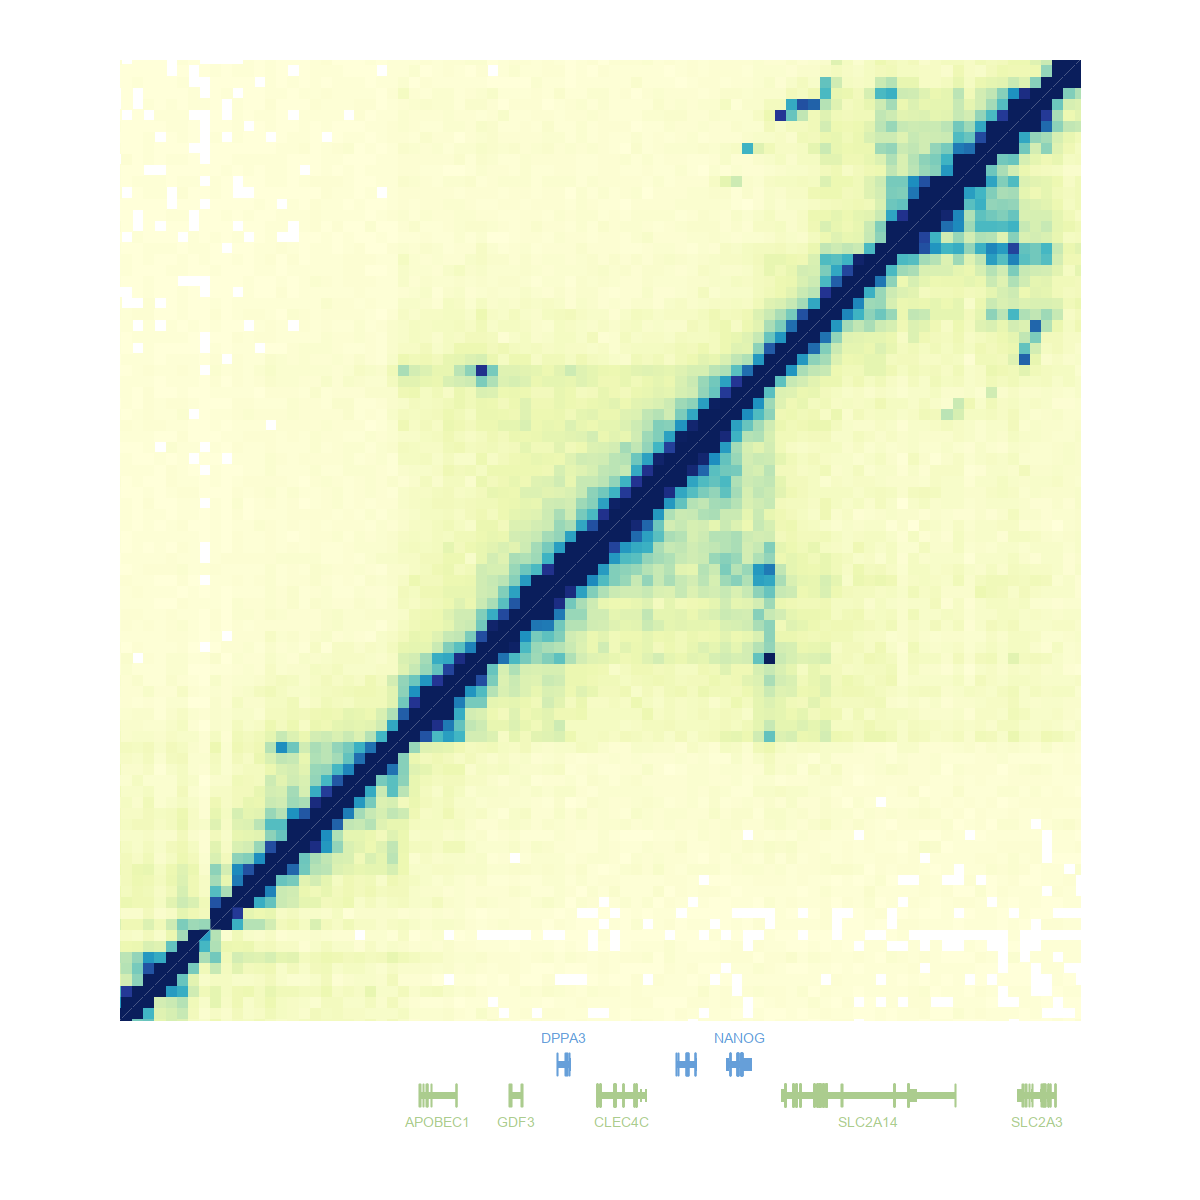

In [406]:
options(repr.plot.width = 10, repr.plot.height = 10)
fig = as.ggplot(make_hic)

fig

In [338]:
df_hff=bb_readHic("/mnt/lab_data3/surag/resources/4DN/HFF-MicroC-4DNFIPC7P27B.hic",
                 chrom="12",
                 chromstart = START,
                 chromend = END,
                    norm=NORM,
          resolution=5000)
df_hesc=bb_readHic("/mnt/lab_data3/surag/resources/4DN/H1-hESC-4DNFI2TK7L2F.hic",
                 chrom="12",
                 chromstart = START,
                 chromend = END,
                    norm=NORM,
          resolution=5000)


colnames(df_hff) = c("x" , "y", "cts")
colnames(df_hesc) = c("x" , "y", "cts")


Read in hic file with NONE normalization at 5000 BP resolution.

Read in hic file with NONE normalization at 5000 BP resolution.



In [361]:
# all y >= x
sum(df_hff$x<=df_hff$y)/nrow(df_hff)

[1] 1

In [339]:
X1=7640000
X2=7710000
X3=7810000

In [340]:
a=sum(df_hff[(df_hff$x>=X1)&(df_hff$y<=X3), ]$cts) 
b=sum(df_hff$cts)
a
b
a/b

[1] 279399

[1] 651259

[1] 0.4290136

In [341]:
a=sum(df_hesc[(df_hesc$x>=X1)&(df_hesc$y<=X3), ]$cts) 
b=sum(df_hesc$cts)
a
b
a/b

[1] 137540

[1] 315683

[1] 0.4356902

In [358]:
short_range_frac <- function(df) {
    a=sum(df[(df$x>=X1)&(df$y<=X3)&(df$y-df$x<=5000), ]$cts) 
    b=sum(df[(df$x>=X1)&(df$y<=X3), ]$cts) 

    a/b 
}


In [357]:
short_range_frac(df_hff)
short_range_frac(df_hesc)

[1] 0.8900668

[1] 0.8076004

In [371]:
long_range_vs_medium_range_within_subdom <- function(df) {
    a=sum(df[(df$x>=X2)&(df$y<=X3)&(df$y-df$x>20000), ]$cts) 
    b=sum(df[(df$x>=X1)&(df$x<X2)&(df$y>=X2)&(df$y<=X3), ]$cts) 

    a/b 
}

long_range_vs_medium_range_within_subdom(df_hff)
long_range_vs_medium_range_within_subdom(df_hesc)

[1] 0.3385694

[1] 0.5074032

In [356]:
short_range_frac <- function(df) {
    a=sum(df[(df$x>=X2)&(df$y<=X3)&(df$y-df$x<=5000), ]$cts) 
    b=sum(df[(df$x>=X2)&(df$y<=X3), ]$cts) 

    a/b 
}


In [327]:
a=sum(df_hff[((df_hff$x>X3)|(df_hff$x<=X2))&(df_hff$y>X2)&(df_hff$y<=X3), ]$cts) 
b=sum(df_hff[(df_hff$x>X2)&(df_hff$x<=X3)&(df_hff$y>X2)&(df_hff$y<=X3), ]$cts)
a
b
a/b

[1] 17260

[1] 149137

[1] 0.1157325

In [328]:
a=sum(df_hesc[((df_hesc$x>X3)|(df_hesc$x<=X2))&(df_hesc$y>X2)&(df_hesc$y<X3), ]$cts) 
b=sum(df_hesc[(df_hesc$x>X2)&(df_hesc$x<=X3)&(df_hesc$y>X2)&(df_hesc$y<X3), ]$cts)
a
b
a/b

[1] 13513

[1] 71005

[1] 0.1903105

In [311]:
a=sum(df_hesc[(df_hesc$x>=X1)&(df_hesc$x<=X2)&(df_hesc$y>X2)&(df_hesc$y<X3), ]$cts) 
b=sum(df_hesc[(df_hesc$x>X2)&(df_hesc$x<=X3)&(df_hesc$y>X2)&(df_hesc$y<X3), ]$cts)
a
b
a/b

[1] 11623

[1] 71005

[1] 0.1636927

In [273]:
df_hff

,x,y,cts
,<int>,<int>,<dbl>
1,7515000,7515000,2770
2,7515000,7520000,995
3,7520000,7520000,2977
4,7515000,7525000,267
5,7520000,7525000,1187
6,7525000,7525000,5924
7,7515000,7530000,66
8,7520000,7530000,110
9,7525000,7530000,646


In [217]:
library(ggplot2)

In [224]:
library(scales)

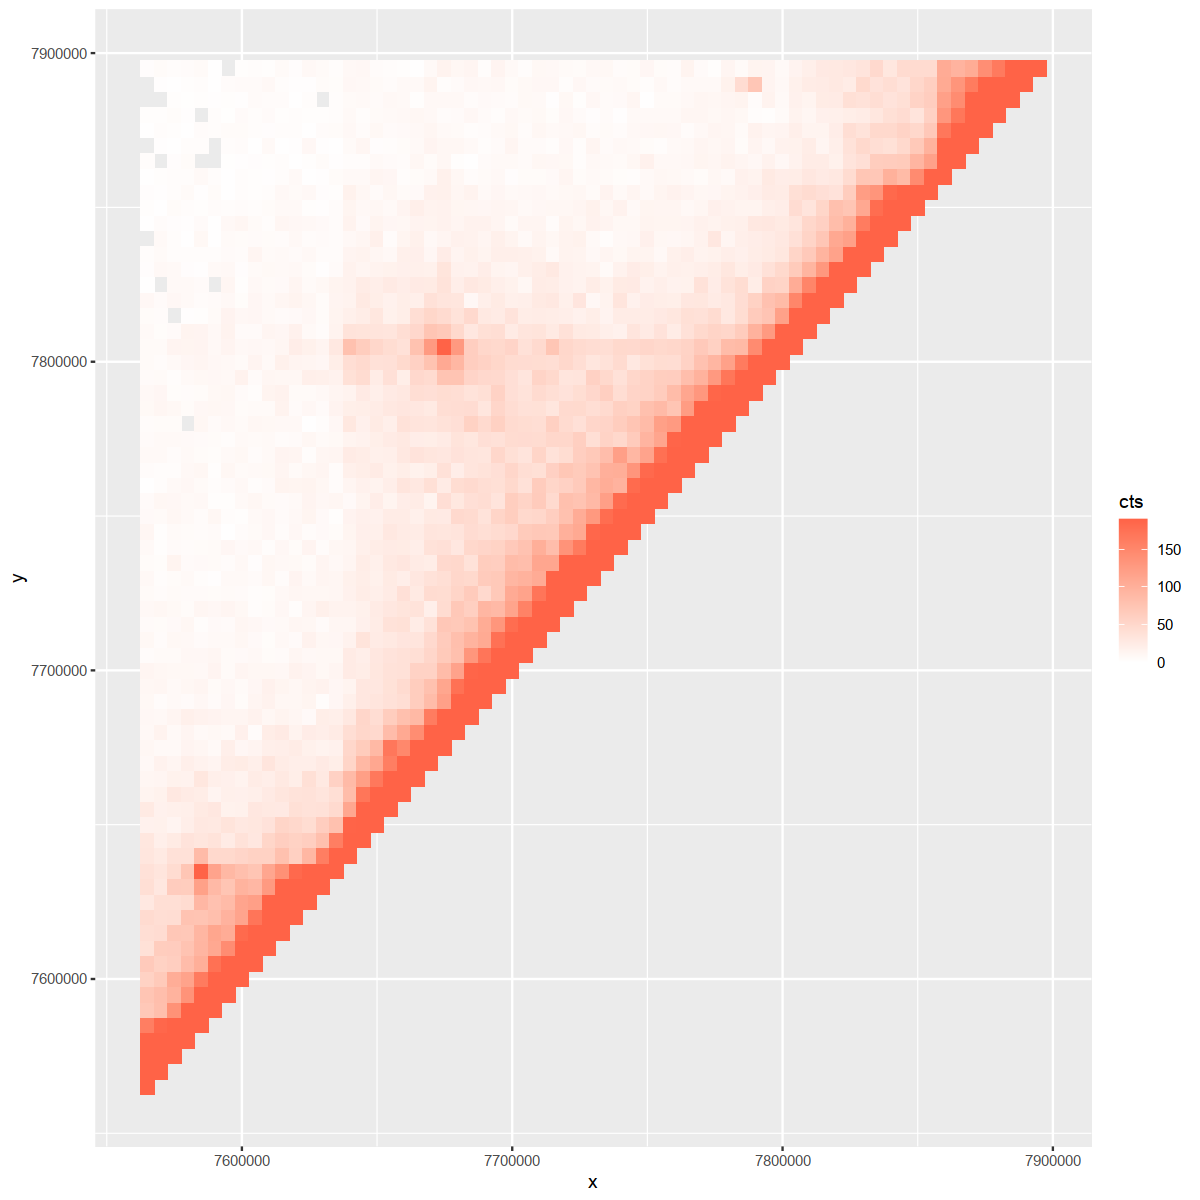

In [240]:
ggplot(df_hff) + 
geom_tile(aes(x=x,y=y,fill=cts)) +
# scale_fill_continuous()  + 
scale_fill_gradient(low="white", high="tomato", lim=c(0,190), oob=squish)

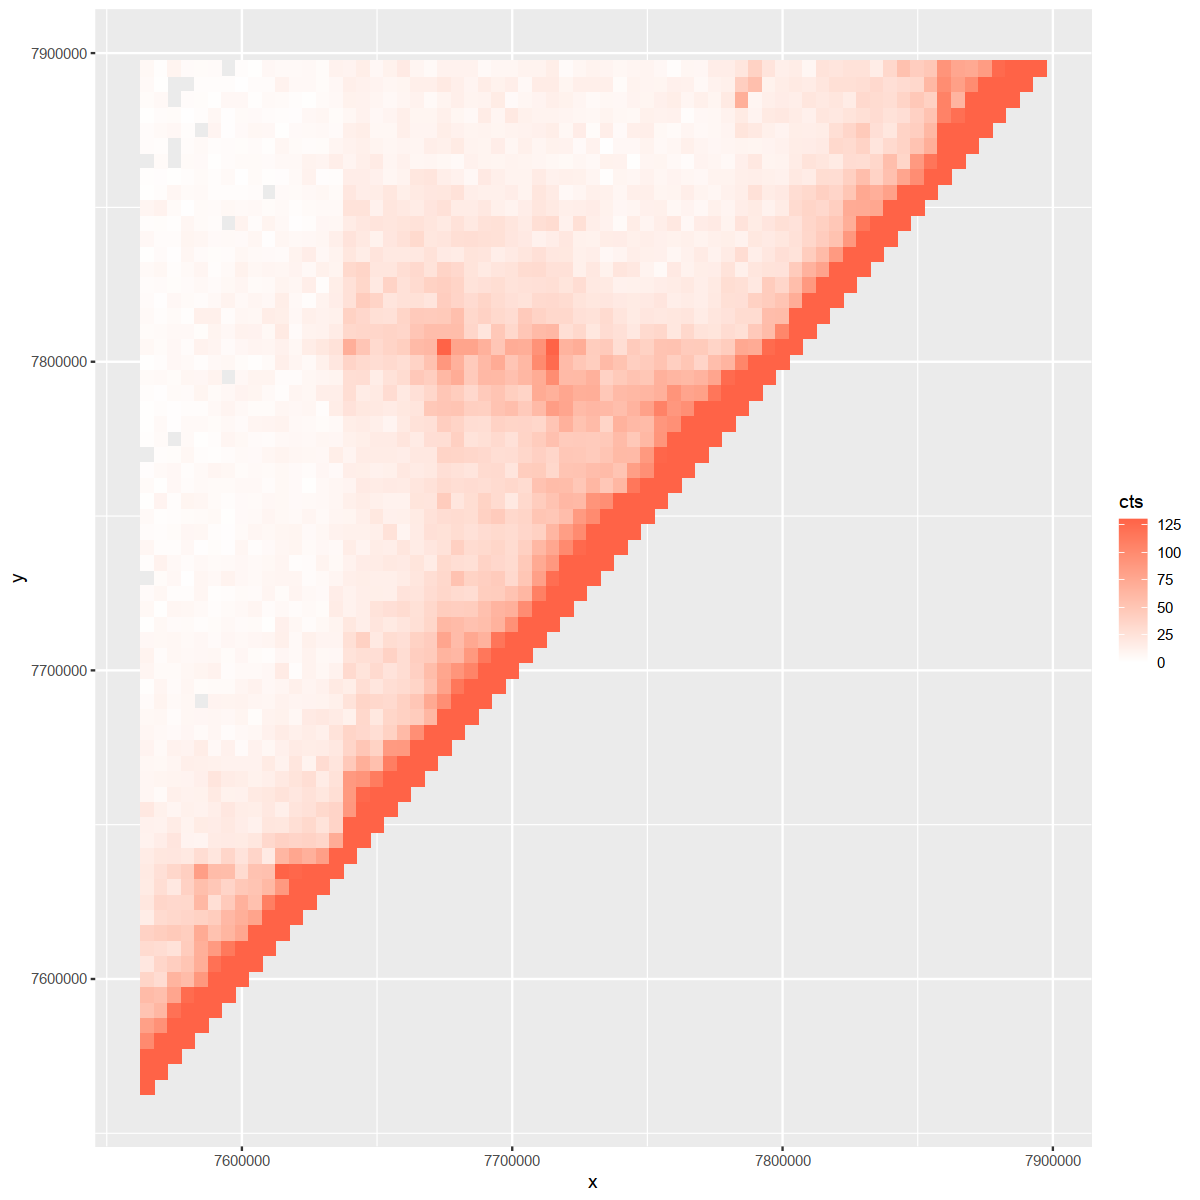

In [239]:
ggplot(df_hesc) + 
geom_tile(aes(x=x,y=y,fill=cts)) +
# scale_fill_continuous()  + 
scale_fill_gradient(low="white", high="tomato", lim=c(0,130), oob=squish)

In [391]:
TxDb.Hsapiens.UCSC.hg38.knownGene

TxDb object:
# Db type: TxDb
# Supporting package: GenomicFeatures
# Data source: UCSC
# Genome: hg38
# Organism: Homo sapiens
# Taxonomy ID: 9606
# UCSC Table: knownGene
# UCSC Track: GENCODE v32
# Resource URL: http://genome.ucsc.edu/
# Type of Gene ID: Entrez Gene ID
# Full dataset: yes
# miRBase build ID: NA
# transcript_nrow: 247541
# exon_nrow: 687521
# cds_nrow: 302763
# Db created by: GenomicFeatures package from Bioconductor
# Creation time: 2019-10-21 20:50:00 +0000 (Mon, 21 Oct 2019)
# GenomicFeatures version at creation time: 1.37.4
# RSQLite version at creation time: 2.1.2
# DBSCHEMAVERSION: 1.2